# Running Machine Learning models

In [298]:
# Import our dependencies
import math
# import pandas_datareader as web

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

from cryptocompare_config import API_Key
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [261]:
Daily_News_df = pd.read_csv("Daily_Coinwise_Senti_score(2016to2021).csv")
Daily_News_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
0,0,2016-07-11,BUSD,0.331579
1,1,2016-07-11,DOGE,0.331579
2,2,2016-07-11,XLM,0.331579
3,3,2016-07-23,BUSD,0.285714
4,4,2016-07-23,DOGE,0.285714
...,...,...,...,...
12899,12899,2021-07-06,ETH,0.064185
12900,12900,2021-07-06,LTC,0.136327
12901,12901,2021-07-06,USDT,0.081108
12902,12902,2021-07-06,XLM,0.095572


In [262]:
# selecting rows based on condition
BTC_df = Daily_News_df[(Daily_News_df['Coin_Symbol'] == 'BTC')]
BTC_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
39,39,2017-02-13,BTC,0.076587
43,43,2017-02-20,BTC,0.037188
62,62,2017-06-15,BTC,0.307652
74,74,2017-06-29,BTC,0.457143
78,78,2017-07-04,BTC,0.299518
...,...,...,...,...
12858,12858,2021-07-02,BTC,0.091679
12867,12867,2021-07-03,BTC,0.108143
12877,12877,2021-07-04,BTC,0.094794
12886,12886,2021-07-05,BTC,0.078018


In [263]:
BTC_df.drop('Unnamed: 0', axis=1)

,Dt_Rev_time,Coin_Symbol,Polarity
39,2017-02-13,BTC,0.076587
43,2017-02-20,BTC,0.037188
62,2017-06-15,BTC,0.307652
74,2017-06-29,BTC,0.457143
78,2017-07-04,BTC,0.299518
...,...,...,...
12858,2021-07-02,BTC,0.091679
12867,2021-07-03,BTC,0.108143
12877,2021-07-04,BTC,0.094794
12886,2021-07-05,BTC,0.078018


In [264]:
# import bitcoin 5 year data
Bitcoin_df = pd.read_csv("C:/UC_Berkeley/Analysis_Projects_Class_Folder/Module20_Final_Project/Cryptocurrency-Analysis/Data/bitcoin(fiveyears).csv")
Bitcoin_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,1164,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10
1,1165,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10
2,1166,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10
3,1167,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10
4,1168,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10
...,...,...,...,...,...,...,...,...,...
1821,2985,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
1822,2986,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
1823,2987,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
1824,2988,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [265]:
Bitcoin_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10
1,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10
2,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10
3,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10
4,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10
...,...,...,...,...,...,...,...,...
1821,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
1822,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
1823,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
1824,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [266]:
# change date to yyyy-mm-dd format
Bitcoin_df['Date'] = pd.to_datetime(Bitcoin_df.Date, format='%Y-%m-%d %H:%M:%S')

In [267]:
Bitcoin_df['Dt_Rev_time'] = Bitcoin_df['Date'].dt.strftime('%Y-%m-%d')
# Bitcoin_Rev_df["Dt_Rev_time"] = Bitcoin_df['Date'].dt.date
Bitcoin_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,1164,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,1165,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,1166,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,1167,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,1168,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...,...,...,...
1821,2985,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,2986,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,2987,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,2988,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [268]:
Bitcoin_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...,...,...
1821,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [269]:
Bitcoin_NN_df= Bitcoin_df.drop(['Name','Date'], axis=1)
Bitcoin_NN_df

,Unnamed: 0,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,1164,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,1165,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,1166,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,1167,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,1168,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...,...
1821,2985,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [270]:
Bitcoin_NN_df.drop('Unnamed: 0', axis=1)

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...
1821,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [271]:
# Join both df
NN_df = pd.merge(Bitcoin_NN_df, BTC_df, how="left", on="Dt_Rev_time")
NN_df

,Unnamed: 0_x,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Unnamed: 0_y,Coin_Symbol,Polarity
0,1164,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06,NaN,NaN,NaN
1,1165,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07,NaN,NaN,NaN
2,1166,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08,NaN,NaN,NaN
3,1167,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09,NaN,NaN,NaN
4,1168,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2985,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,12849.0,BTC,0.087843
1822,2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,12858.0,BTC,0.091679
1823,2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,12867.0,BTC,0.108143
1824,2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,12877.0,BTC,0.094794


In [272]:
NN_df = NN_df.drop(['Unnamed: 0_x','Unnamed: 0_y','Coin_Symbol'], axis=1)

In [273]:
# Replace NaN as '0'
NN_df.isnull().sum().sum()
NN_df.isna().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Marketcap        0
Dt_Rev_time      0
Polarity       428
dtype: int64

In [274]:
# keep only rows without NaN values
Datewise_NN_df = NN_df[NN_df['Polarity'].notna()]
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Polarity
222,1002.099976,976.002014,998.885010,990.642029,1.006070e+08,1.601032e+10,2017-02-13,0.076587
229,1080.489990,1041.689941,1048.689941,1079.979980,1.094780e+08,1.746824e+10,2017-02-20,0.037188
344,2534.709961,2212.959961,2499.580078,2464.580078,2.026260e+09,4.040226e+10,2017-06-15,0.307652
358,2588.830078,2510.479980,2567.560059,2539.320068,9.499790e+08,4.169040e+10,2017-06-29,0.457143
363,2631.590088,2559.350098,2561.000000,2601.639893,9.855160e+08,4.274062e+10,2017-07-04,0.299518
...,...,...,...,...,...,...,...,...
1821,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,0.087843
1822,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,0.091679
1823,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,0.108143
1824,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,0.094794


In [275]:
Datewise_NN_df.dtypes

High           float64
Low            float64
Open           float64
Close          float64
Volume         float64
Marketcap      float64
Dt_Rev_time     object
Polarity       float64
dtype: object

In [276]:
# Determine the number of unique values in each column.
Datewise_NN_df.nunique()

High           1397
Low            1398
Open           1397
Close          1397
Volume         1398
Marketcap      1398
Dt_Rev_time    1398
Polarity       1398
dtype: int64

In [277]:
Datewise_NN_df = Datewise_NN_df.rename(columns={'Dt_Rev_time': 'Date'})
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Date,Polarity
222,1002.099976,976.002014,998.885010,990.642029,1.006070e+08,1.601032e+10,2017-02-13,0.076587
229,1080.489990,1041.689941,1048.689941,1079.979980,1.094780e+08,1.746824e+10,2017-02-20,0.037188
344,2534.709961,2212.959961,2499.580078,2464.580078,2.026260e+09,4.040226e+10,2017-06-15,0.307652
358,2588.830078,2510.479980,2567.560059,2539.320068,9.499790e+08,4.169040e+10,2017-06-29,0.457143
363,2631.590088,2559.350098,2561.000000,2601.639893,9.855160e+08,4.274062e+10,2017-07-04,0.299518
...,...,...,...,...,...,...,...,...
1821,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,0.087843
1822,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,0.091679
1823,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,0.108143
1824,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,0.094794


In [278]:
Datewise_NN_df = Datewise_NN_df[["Date", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Datewise_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity
222,2017-02-13,998.885010,1002.099976,976.002014,990.642029,1.006070e+08,1.601032e+10,0.076587
229,2017-02-20,1048.689941,1080.489990,1041.689941,1079.979980,1.094780e+08,1.746824e+10,0.037188
344,2017-06-15,2499.580078,2534.709961,2212.959961,2464.580078,2.026260e+09,4.040226e+10,0.307652
358,2017-06-29,2567.560059,2588.830078,2510.479980,2539.320068,9.499790e+08,4.169040e+10,0.457143
363,2017-07-04,2561.000000,2631.590088,2559.350098,2601.639893,9.855160e+08,4.274062e+10,0.299518
...,...,...,...,...,...,...,...,...
1821,2021-07-01,35035.982712,35035.982712,32883.781226,33572.117653,3.783896e+10,6.293393e+11,0.087843
1822,2021-07-02,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,6.354508e+11,0.091679
1823,2021-07-03,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,6.499397e+11,0.108143
1824,2021-07-04,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,6.615748e+11,0.094794


In [279]:
Datewise_NN_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [280]:
Datewise_NN_df['Date'] = pd.to_datetime(Datewise_NN_df['Date'])
Datewise_NN_df

Datewise_NN_df['Epoch_Dt'] = (Datewise_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
Datewise_NN_df

# Final_NN_df['epoch'] = (Final_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
# Final_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity,Epoch_Dt
222,2017-02-13,998.885010,1002.099976,976.002014,990.642029,1.006070e+08,1.601032e+10,0.076587,1.486944e+09
229,2017-02-20,1048.689941,1080.489990,1041.689941,1079.979980,1.094780e+08,1.746824e+10,0.037188,1.487549e+09
344,2017-06-15,2499.580078,2534.709961,2212.959961,2464.580078,2.026260e+09,4.040226e+10,0.307652,1.497485e+09
358,2017-06-29,2567.560059,2588.830078,2510.479980,2539.320068,9.499790e+08,4.169040e+10,0.457143,1.498694e+09
363,2017-07-04,2561.000000,2631.590088,2559.350098,2601.639893,9.855160e+08,4.274062e+10,0.299518,1.499126e+09
...,...,...,...,...,...,...,...,...,...
1821,2021-07-01,35035.982712,35035.982712,32883.781226,33572.117653,3.783896e+10,6.293393e+11,0.087843,1.625098e+09
1822,2021-07-02,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,6.354508e+11,0.091679,1.625184e+09
1823,2021-07-03,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,6.499397e+11,0.108143,1.625270e+09
1824,2021-07-04,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,6.615748e+11,0.094794,1.625357e+09


In [281]:
Final_NN_df = Datewise_NN_df[["Epoch_Dt", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Final_NN_df

,Epoch_Dt,Open,High,Low,Close,Volume,Marketcap,Polarity
222,1.486944e+09,998.885010,1002.099976,976.002014,990.642029,1.006070e+08,1.601032e+10,0.076587
229,1.487549e+09,1048.689941,1080.489990,1041.689941,1079.979980,1.094780e+08,1.746824e+10,0.037188
344,1.497485e+09,2499.580078,2534.709961,2212.959961,2464.580078,2.026260e+09,4.040226e+10,0.307652
358,1.498694e+09,2567.560059,2588.830078,2510.479980,2539.320068,9.499790e+08,4.169040e+10,0.457143
363,1.499126e+09,2561.000000,2631.590088,2559.350098,2601.639893,9.855160e+08,4.274062e+10,0.299518
...,...,...,...,...,...,...,...,...
1821,1.625098e+09,35035.982712,35035.982712,32883.781226,33572.117653,3.783896e+10,6.293393e+11,0.087843
1822,1.625184e+09,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,6.354508e+11,0.091679
1823,1.625270e+09,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,6.499397e+11,0.108143
1824,1.625357e+09,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,6.615748e+11,0.094794


In [282]:
Final_NN_df.dtypes

Epoch_Dt     float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [283]:
Final_NN_df.shape

(1398, 8)

In [284]:
Datewise_NN_df =  Datewise_NN_df.set_index('Date')

<function matplotlib.pyplot.show(close=None, block=None)>

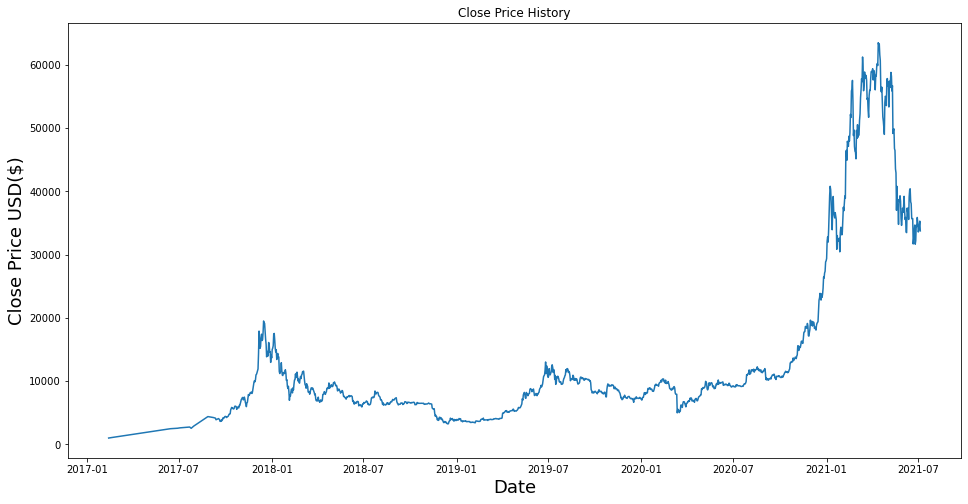

In [285]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Datewise_NN_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show

In [286]:
#create a new df with the close columm
data = Datewise_NN_df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# number of rows to train
training_data_len = math.ceil( len(dataset) * .8 )

print(training_data_len)

1119


In [287]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00142911],
       [0.02357817],
       ...,
       [0.53873603],
       [0.5486417 ],
       [0.52397832]])

In [288]:
training_data_len

1119

In [289]:
# create the training data_set
# scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<60:
        print(x_train)
        print(y_train)
        print()

In [290]:
x_train

[array([0.        , 0.00142911, 0.02357817, 0.02477377, 0.02577068,
        0.02783042, 0.02461588, 0.03014899, 0.05426116, 0.05179911,
        0.05023239, 0.04626168, 0.04918284, 0.04663536, 0.04223771,
        0.04223227, 0.04481894, 0.04306634, 0.04695722, 0.04641781,
        0.05134992, 0.05093496, 0.05074844, 0.0535581 , 0.05459838,
        0.05468763, 0.05321849, 0.05180886, 0.05339334, 0.0540716 ,
        0.0549687 , 0.05790553, 0.06048964, 0.06064913, 0.06136082,
        0.07128567, 0.07448981, 0.07744249, 0.07498539, 0.07574363,
        0.07382275, 0.07358568, 0.07547057, 0.08031646, 0.08063879,
        0.08026799, 0.07901864, 0.07256109, 0.07614691, 0.07861089,
        0.07662841, 0.07618354, 0.08259439, 0.08222134, 0.08762616,
        0.09240774, 0.09738576, 0.09945349, 0.10220797, 0.10264724]),
 array([0.00142911, 0.02357817, 0.02477377, 0.02577068, 0.02783042,
        0.02461588, 0.03014899, 0.05426116, 0.05179911, 0.05023239,
        0.04626168, 0.04918284, 0.04663536, 0.

In [291]:
y_train

[0.09649409724771506,
 0.09843962018463355,
 0.10348354684266756,
 0.09842682593315139,
 0.09002151041776699,
 0.08585372441571708,
 0.07933457682075977,
 0.08908330436356725,
 0.09030321046642631,
 0.10117762124540831,
 0.11007419540103613,
 0.10747153377581163,
 0.10876982224352016,
 0.11271045951092257,
 0.11533631169332079,
 0.11326665795997104,
 0.11618270063752495,
 0.11274692859527555,
 0.11618495017624711,
 0.12477885983206902,
 0.1334111678641341,
 0.14121436465912474,
 0.14506077905984263,
 0.1423383060649693,
 0.1478570025568494,
 0.1597265686498336,
 0.16131024391021828,
 0.16528703782604004,
 0.1706299422398631,
 0.17478109102844722,
 0.21277009808955805,
 0.27048944998121177,
 0.24920903237494613,
 0.22695439266223152,
 0.23138868651566796,
 0.25508623347887016,
 0.2627422573273243,
 0.24663034239672937,
 0.2491226438392974,
 0.2674053011495681,
 0.29604742795480826,
 0.2903430039221817,
 0.2899174661805774,
 0.2685218534455823,
 0.25009203881057174,
 0.23694754664681622,

In [292]:
# convert the x_train and y_train into numpy arrays
x_train, y_train, = np.array(x_train), np.array(y_train)

In [293]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1059, 60, 1)

# Running the Machine Learning model

In [354]:
# Building the model by importing the crucial libraries and adding different layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [378]:
es = EarlyStopping(monitor = 'loss', patience = 20, verbose = 1)

In [393]:
#Attempt 1
# adding layers to LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [394]:
# #Attempt 2
# # adding layers to LSTM
# model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))

In [395]:
# fitting the model
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks = [es])

Epoch 1/100
34/34 [==============================] - 15s 155ms/step - loss: 0.0021
Epoch 2/100
34/34 [==============================] - 6s 172ms/step - loss: 6.4502e-04
Epoch 3/100
34/34 [==============================] - 6s 176ms/step - loss: 4.9090e-04
Epoch 4/100
34/34 [==============================] - 6s 169ms/step - loss: 5.4367e-04
Epoch 5/100
34/34 [==============================] - 5s 151ms/step - loss: 4.2698e-04
Epoch 6/100
34/34 [==============================] - 6s 186ms/step - loss: 4.4646e-04
Epoch 7/100
34/34 [==============================] - 6s 184ms/step - loss: 4.1866e-04
Epoch 8/100
34/34 [==============================] - 5s 139ms/step - loss: 3.6738e-04
Epoch 9/100
34/34 [==============================] - 5s 136ms/step - loss: 3.1494e-04
Epoch 10/100
34/34 [==============================] - 4s 116ms/step - loss: 3.1433e-04
Epoch 11/100
34/34 [==============================] - 4s 120ms/step - loss: 3.1465e-04
Epoch 12/100
34/34 [==============================] - 4

In [359]:
# train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print(f'Train accuracy: {train_acc*100:.3f} % || Test accuracy: {test_acc*100:.3f} %')
# print(f'Train loss: {train_loss:.3f} || Test loss: {test_loss:.3f}')

# Testing data

In [396]:
print(scaled_data.shape)
print(training_data_len)

(1398, 1)
1119


In [397]:
print(scaled_data)

[[0.        ]
 [0.00142911]
 [0.02357817]
 ...
 [0.53873603]
 [0.5486417 ]
 [0.52397832]]


In [398]:
# create test data
# create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 60:, :]

#Create the x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [399]:
print(test_data)


[[0.17226789]
 [0.16097454]
 [0.16405767]
 [0.16341051]
 [0.17206681]
 [0.17259071]
 [0.16973849]
 [0.17217915]
 [0.17092651]
 [0.1741638 ]
 [0.16668396]
 [0.16947393]
 [0.17266052]
 [0.1724163 ]
 [0.17396523]
 [0.17439883]
 [0.18018321]
 [0.17597338]
 [0.17224695]
 [0.17416796]
 [0.16959478]
 [0.17102387]
 [0.17075228]
 [0.17250789]
 [0.16597386]
 [0.16792911]
 [0.16529019]
 [0.16879511]
 [0.16822508]
 [0.17149866]
 [0.17100779]
 [0.17564137]
 [0.16674008]
 [0.14804412]
 [0.15230752]
 [0.14683269]
 [0.14860488]
 [0.15003198]
 [0.14622401]
 [0.14799694]
 [0.14992921]
 [0.15053349]
 [0.15119345]
 [0.14929921]
 [0.15501134]
 [0.15686878]
 [0.15971546]
 [0.1593009 ]
 [0.15923045]
 [0.16162613]
 [0.15912944]
 [0.15151481]
 [0.15273377]
 [0.14805835]
 [0.15627874]
 [0.15520138]
 [0.15612929]
 [0.15652194]
 [0.15547228]
 [0.15763166]
 [0.15666947]
 [0.15402937]
 [0.15333389]
 [0.15290764]
 [0.1548313 ]
 [0.156811  ]
 [0.15378869]
 [0.15482148]
 [0.15876814]
 [0.161148  ]
 [0.16485771]
 [0.16

In [400]:
#convert data into numpy array
x_test = np.array(x_test)

In [401]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(279, 60, 1)

In [402]:
# # Predicting Jan & Feb prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[10148.049 ],
       [10154.657 ],
       [10045.909 ],
       [ 9966.597 ],
       [ 9934.422 ],
       [10006.239 ],
       [10121.786 ],
       [10045.822 ],
       [10022.602 ],
       [10179.982 ],
       [10354.623 ],
       [10552.47  ],
       [10673.06  ],
       [10804.6455],
       [10773.779 ],
       [10743.872 ],
       [10786.075 ],
       [10711.033 ],
       [10690.514 ],
       [10774.552 ],
       [10977.84  ],
       [11165.312 ],
       [11783.384 ],
       [12131.802 ],
       [12157.055 ],
       [12231.419 ],
       [12232.591 ],
       [12263.054 ],
       [12658.144 ],
       [12595.989 ],
       [12600.652 ],
       [12690.852 ],
       [12881.748 ],
       [12923.701 ],
       [12788.664 ],
       [12977.945 ],
       [13208.6875],
       [14212.251 ],
       [14593.717 ],
       [14097.754 ],
       [14257.41  ],
       [14343.84  ],
       [14337.125 ],
       [14597.375 ],
       [15089.839 ],
       [15271.574 ],
       [15093.471 ],
       [14921

In [403]:
#get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( predictions-y_test )**2)
rmse

5261.333935423871

C:\Users\lavin\AppData\Local\Temp/ipykernel_28960/1655131627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

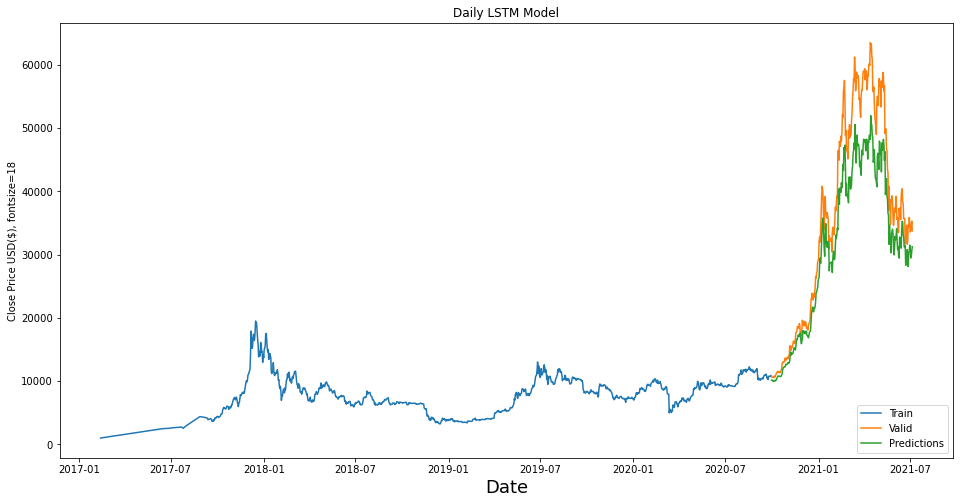

In [404]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize=(16,8))
plt.title('Daily LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($), fontsize=18')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show

In [405]:
# show valid and predicted 
valid

,Close,Predictions
Date,,
2020-09-30,10784.491578,10148.048828
2020-10-01,10619.451908,10154.657227
2020-10-02,10575.975042,10045.909180
2020-10-03,10549.328900,9966.596680
2020-10-04,10669.582543,9934.421875
...,...,...
2021-07-01,33572.117653,30827.605469
2021-07-02,33897.048590,29464.767578
2021-07-03,34668.548402,29674.585938


# Fetch last 60 days data from cryptocompare.com

In [406]:
# fetch data from API
api_endpoint = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=61&aggregate=3&e=CCCAGG&api_key='
api_endpoint += API_Key

In [407]:
# retrieve data
data_retrieved = requests.get(api_endpoint).json()
data_retrieved

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Aggregated': True,
  'TimeFrom': 1628294400,
  'TimeTo': 1644192000,
  'Data': [{'time': 1628294400,
    'high': 46476.01,
    'low': 42473.57,
    'open': 42852.18,
    'volumefrom': 138896.72,
    'volumeto': 6165342833.96,
    'close': 46292.61,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1628553600,
    'high': 46763.89,
    'low': 43786.4,
    'open': 46292.61,
    'volumefrom': 101597.8,
    'volumeto': 4620293352.81,
    'close': 44425.52,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1628812800,
    'high': 48136.25,
    'low': 44260.38,
    'open': 44425.52,
    'volumefrom': 76303.99,
    'volumeto': 3552882286.95,
    'close': 47015.94,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1629072000,
    'high': 48064.42,
    'low': 44240.9,
    'open': 47015.94,
    'volumefrom': 96099.64,
    'v

In [408]:
data_retrieved_json = data_retrieved['Data']['Data']
data_retrieved_json

[{'time': 1628294400,
  'high': 46476.01,
  'low': 42473.57,
  'open': 42852.18,
  'volumefrom': 138896.72,
  'volumeto': 6165342833.96,
  'close': 46292.61,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1628553600,
  'high': 46763.89,
  'low': 43786.4,
  'open': 46292.61,
  'volumefrom': 101597.8,
  'volumeto': 4620293352.81,
  'close': 44425.52,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1628812800,
  'high': 48136.25,
  'low': 44260.38,
  'open': 44425.52,
  'volumefrom': 76303.99,
  'volumeto': 3552882286.95,
  'close': 47015.94,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1629072000,
  'high': 48064.42,
  'low': 44240.9,
  'open': 47015.94,
  'volumefrom': 96099.64,
  'volumeto': 4410564657.42,
  'close': 44714.54,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1629331200,
  'high': 49809.82,
  'low': 43982.21,
  'open': 44714.54,
  'volumefrom': 92555.22,
  'volumeto': 4379110699.72,
  'close'

In [409]:
last_60_days = pd.json_normalize(data_retrieved_json)
last_60_days

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1628294400,46476.01,42473.57,42852.18,138896.72,6.165343e+09,46292.61,direct,
1,1628553600,46763.89,43786.40,46292.61,101597.80,4.620293e+09,44425.52,direct,
2,1628812800,48136.25,44260.38,44425.52,76303.99,3.552882e+09,47015.94,direct,
3,1629072000,48064.42,44240.90,47015.94,96099.64,4.410565e+09,44714.54,direct,
4,1629331200,49809.82,43982.21,44714.54,92555.22,4.379111e+09,48867.87,direct,
...,...,...,...,...,...,...,...,...,...
57,1643068800,38930.36,35543.94,36702.79,148029.16,5.466779e+09,37189.85,direct,
58,1643328000,38728.29,36176.78,37189.85,80305.40,3.011297e+09,37908.44,direct,
59,1643587200,39281.06,36650.80,37908.44,96364.94,3.666579e+09,36918.19,direct,
60,1643846400,41954.24,36270.47,36918.19,100229.45,3.913921e+09,41418.21,direct,


In [410]:
last_60_days

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1628294400,46476.01,42473.57,42852.18,138896.72,6.165343e+09,46292.61,direct,
1,1628553600,46763.89,43786.40,46292.61,101597.80,4.620293e+09,44425.52,direct,
2,1628812800,48136.25,44260.38,44425.52,76303.99,3.552882e+09,47015.94,direct,
3,1629072000,48064.42,44240.90,47015.94,96099.64,4.410565e+09,44714.54,direct,
4,1629331200,49809.82,43982.21,44714.54,92555.22,4.379111e+09,48867.87,direct,
...,...,...,...,...,...,...,...,...,...
57,1643068800,38930.36,35543.94,36702.79,148029.16,5.466779e+09,37189.85,direct,
58,1643328000,38728.29,36176.78,37189.85,80305.40,3.011297e+09,37908.44,direct,
59,1643587200,39281.06,36650.80,37908.44,96364.94,3.666579e+09,36918.19,direct,
60,1643846400,41954.24,36270.47,36918.19,100229.45,3.913921e+09,41418.21,direct,


In [411]:
last_60_days["Rev_time"] = pd.to_datetime(last_60_days['time'],unit='s')
last_60_days["Date"] = last_60_days['Rev_time'].dt.date

last_60_days = last_60_days.set_index('Date')
Data_Close_last_60 = last_60_days.filter(['close'])
Data_Close_last_60

,close
Date,
2021-08-07,46292.61
2021-08-10,44425.52
2021-08-13,47015.94
2021-08-16,44714.54
2021-08-19,48867.87
...,...
2022-01-25,37189.85
2022-01-28,37908.44
2022-01-31,36918.19


In [412]:
Close_last_60 = Data_Close_last_60[:60].values
Close_last_60

array([[46292.61],
       [44425.52],
       [47015.94],
       [44714.54],
       [48867.87],
       [47690.54],
       [49088.1 ],
       [46993.31],
       [49280.77],
       [51784.16],
       [46073.45],
       [45166.12],
       [47129.01],
       [47297.98],
       [42925.46],
       [44893.87],
       [43201.79],
       [41539.43],
       [47669.02],
       [51504.27],
       [53949.29],
       [57498.8 ],
       [57359.21],
       [61520.54],
       [66021.02],
       [61313.09],
       [60315.68],
       [62282.5 ],
       [60960.98],
       [61448.47],
       [63302.78],
       [64926.06],
       [64409.56],
       [60108.9 ],
       [58136.22],
       [56303.06],
       [58966.99],
       [57331.41],
       [57227.97],
       [49243.39],
       [50633.01],
       [47191.14],
       [46731.03],
       [47635.92],
       [46697.13],
       [48614.97],
       [50431.63],
       [47536.39],
       [46197.31],
       [46450.79],
       [43094.54],
       [41869.6 ],
       [4391

In [413]:
# scale the close_last_60 data
Close_last_60_scaled = scaler.transform(Close_last_60)
# create an empty list
X_test = []
# Append the last 60 days
# for i in range(60, len(Close_last_60_scaled)):
#     X_test.append(Close_last_60_scaled[i-60:i, 0])
X_test.append(Close_last_60_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(f"Price prediction for 3rd Feb is {pred_price} and actual price is $41418.21")

Price prediction for 3rd Feb is [[32291.404]] and actual price is $41418.21


In [373]:
X_test
X_test.shape

(1, 60, 1)

In [258]:
print(len(Data_Close_last_60))
print(len(pred_price))

62
1


In [259]:
new_valid = Data_Close_last_60
# new_valid['Predictions'] = pred_price
new_valid

,close
Date,
2021-08-07,46292.61
2021-08-10,44425.52
2021-08-13,47015.94
2021-08-16,44714.54
2021-08-19,48867.87
...,...
2022-01-25,37189.85
2022-01-28,37908.44
2022-01-31,36918.19
